# Imports

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Utils

In [74]:
def plot_mean_values(df, title, x_label='Deltas', y_label='Média'):
    mean_values = df.mean(axis=0)

    plt.figure(figsize=(10, 6))
    plt.plot(df.columns, mean_values, marker='o')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title)
    plt.grid(True)
    plt.show()

In [75]:
def process_model_data(df, model_name, columns, column_name = "len_milp_relaxed"):
    model_data = df.query(f'modelo == "{model_name}"')[column_name]
    model_data = model_data.apply(eval)
    df_model = pd.DataFrame(model_data.tolist(), columns=columns)
    mean_values = np.mean(df_model, axis=0).to_list()
    std_values = np.std(df_model, axis=0).to_list()
    return df_model, mean_values, std_values

In [76]:
def format_mean_std(
    m1_mean: list,
    m2_mean: list,
    m3_mean: list,
    m1_std: list,
    m2_std: list,
    m3_std: list,
    columns: list,
    mean_format: str = "{:.2f}",
    std_format: str = "{:.4f}",
):
    df_mean = pd.DataFrame(
        [m1_mean, m2_mean, m3_mean], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )
    df_std = pd.DataFrame(
        [m1_std, m2_std, m3_std], 
        columns=columns, index=["1L20N", "2L20N", "3L20N"]
    )

    df_formatted = (
        df_mean.apply(lambda row: row.map(mean_format.format))
        + " ± "
        + df_std.apply(lambda row: row.map(std_format.format))
    )
    df_formatted = df_formatted.T
    return df_formatted

# Data

In [77]:
import os

path = os.path.join(
    # "results",
    "relaxed",
    "get_explanation_range",
    "layer 0 fixed"
)


iris = pd.read_csv(os.path.join(path, "iris.csv"))
wine = pd.read_csv(os.path.join(path, "wine.csv"))
breast_cancer = pd.read_csv(os.path.join(path, "breast_cancer.csv"))
glass = pd.read_csv(os.path.join(path, "glass.csv"))
digits = pd.read_csv(os.path.join(path, "digits.csv"))

data = pd.concat([iris, wine, breast_cancer, glass, digits], ignore_index=True)
data

,dataset,modelo,instance,relaxed_times,relaxed_len_eq,relaxed_len_range,relaxed_explanation
0,iris,model_1layers_20neurons.h5,0,"[0.05529618263244629, 0.036804914474487305, 0....","[1, 2, 3, 3, 3, 3, 3, 3, 3, 3]","[3, 2, 1, 1, 1, 1, 1, 1, 1, 1]","[{'eq': {'x_3': 0.5000000000000001}, 'range': ..."
1,iris,model_1layers_20neurons.h5,1,"[0.04395651817321777, 0.04059314727783203, 0.0...","[0, 0, 0, 1, 2, 2, 2, 2, 3, 3]","[4, 4, 4, 3, 2, 2, 2, 2, 1, 1]","[{'eq': {}, 'range': [docplex.mp.RangeConstrai..."
2,iris,model_1layers_20neurons.h5,2,"[0.034568071365356445, 0.03469491004943848, 0....","[0, 0, 0, 1, 1, 2, 2, 2, 2, 2]","[4, 4, 4, 3, 3, 2, 2, 2, 2, 2]","[{'eq': {}, 'range': [docplex.mp.RangeConstrai..."
3,iris,model_1layers_20neurons.h5,3,"[0.03812718391418457, 0.04275178909301758, 0.0...","[2, 3, 3, 3, 4, 4, 4, 4, 4, 4]","[2, 1, 1, 1, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_1': 0.4374999999999998, 'x_3': 0.6..."
4,iris,model_1layers_20neurons.h5,4,"[0.03818488121032715, 0.04397773742675781, 0.0...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.65625, 'x_1': 0.374999999999..."
...,...,...,...,...,...,...,...
1495,digits,model_3layers_20neurons.h5,95,"[0.7977991104125977, 0.7166833877563477, 0.587...","[64, 64, 64, 64, 64, 64, 64, 64, 64, 64]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.0, 'x_1': 0.375, 'x_2': 0.81..."
1496,digits,model_3layers_20neurons.h5,96,"[0.716641902923584, 0.6257412433624268, 0.9752...","[64, 64, 64, 64, 64, 64, 64, 64, 64, 64]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.0, 'x_1': 0.0, 'x_2': 0.0, '..."
1497,digits,model_3layers_20neurons.h5,97,"[0.846304178237915, 0.5982275009155273, 0.5828...","[64, 64, 64, 64, 64, 64, 64, 64, 64, 64]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.0, 'x_1': 0.0, 'x_2': 0.125,..."
1498,digits,model_3layers_20neurons.h5,98,"[0.9076259136199951, 0.6321046352386475, 0.578...","[64, 64, 64, 64, 64, 64, 64, 64, 64, 64]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[{'eq': {'x_0': 0.0, 'x_1': 0.0, 'x_2': 0.0, '..."


In [78]:
deltas = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Iris

### Tamanho

In [79]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(
    df=iris,
    model_name='model_1layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(
    df=iris,
    model_name='model_2layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)


# iris_m3, iris_m3_mean, iris_m3_std = process_model_data(iris, 'model_3layers_20neurons.h5', deltas)
iris_m3, iris_m3_mean, iris_m3_std = process_model_data(
    df=iris,
    model_name='model_3layers_20neurons.h5',
    columns=deltas,
    column_name="relaxed_len_eq"
)

format_mean_std(iris_m1_mean, iris_m2_mean, iris_m3_mean, iris_m1_std, iris_m2_std, iris_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,0.71 ± 1.0129,1.53 ± 1.5521,2.16 ± 1.7420
0.2,1.42 ± 1.1763,2.21 ± 1.2433,2.84 ± 1.1465
0.3,2.15 ± 0.9937,2.69 ± 0.9132,3.11 ± 0.9044
0.4,2.52 ± 0.7547,2.83 ± 0.7753,3.31 ± 0.7169
0.5,2.74 ± 0.7432,3.00 ± 0.7071,3.38 ± 0.6600
0.6,2.98 ± 0.6478,3.17 ± 0.5840,3.48 ± 0.5381
0.7,3.11 ± 0.5813,3.19 ± 0.5603,3.54 ± 0.4984
0.8,3.16 ± 0.5426,3.24 ± 0.4923,3.57 ± 0.4951
0.9,3.19 ± 0.5039,3.27 ± 0.4440,3.57 ± 0.4951
1.0,3.19 ± 0.5039,3.27 ± 0.4440,3.57 ± 0.4951


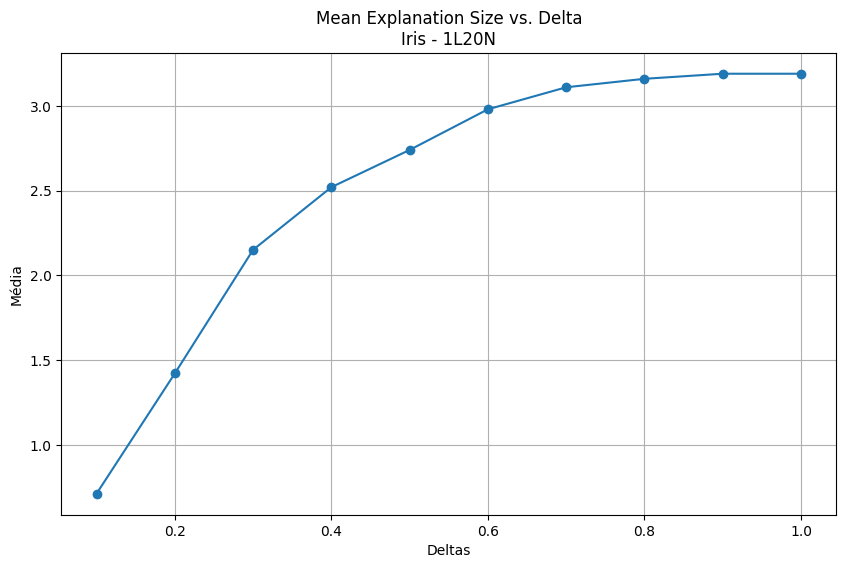

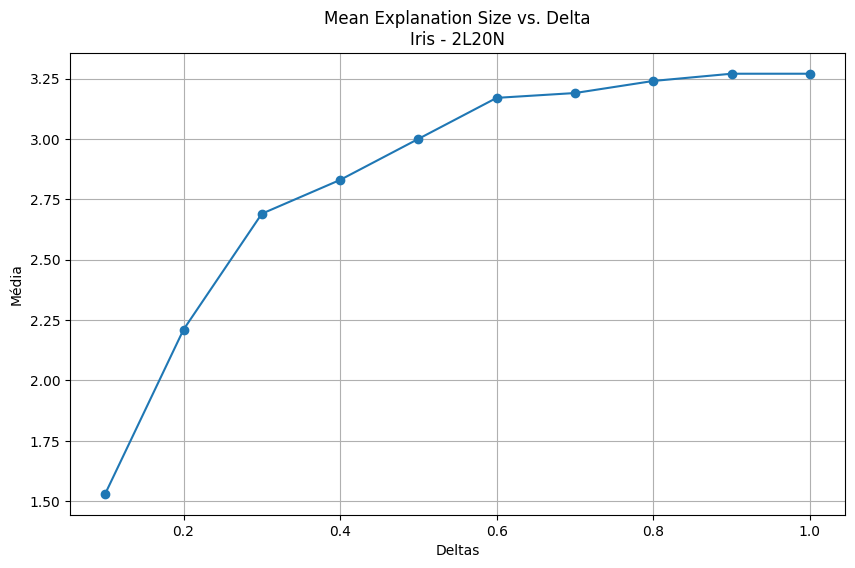

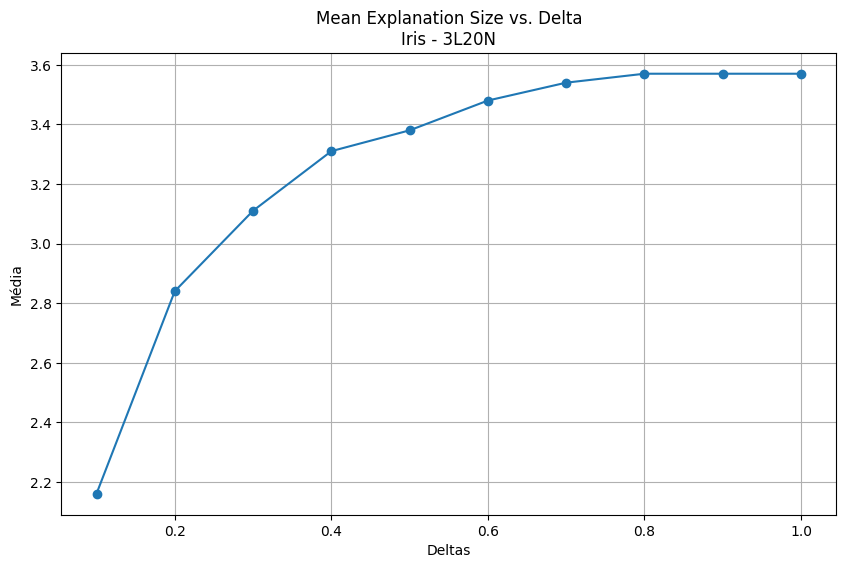

In [80]:
plot_mean_values(iris_m1, 'Mean Explanation Size vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Explanation Size vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Explanation Size vs. Delta\nIris - 3L20N')

### Tempo

In [81]:
iris_m1, iris_m1_mean, iris_m1_std = process_model_data(iris, "model_1layers_20neurons.h5", deltas, column_name="relaxed_times")
iris_m2, iris_m2_mean, iris_m2_std = process_model_data(iris, "model_2layers_20neurons.h5", deltas, column_name="relaxed_times")
iris_m3, iris_m3_mean, iris_m3_std = process_model_data(iris, "model_3layers_20neurons.h5", deltas, column_name="relaxed_times")

format_mean_std(
    iris_m1_mean,
    iris_m2_mean,
    iris_m3_mean,
    iris_m1_std,
    iris_m2_std,
    iris_m3_std,
    deltas,
    mean_format="{:.4f}",
    std_format="{:.4f}",
)

,1L20N,2L20N,3L20N
0.1,0.0410 ± 0.0258,0.0528 ± 0.0239,0.0767 ± 0.0292
0.2,0.0414 ± 0.0195,0.0537 ± 0.0173,0.0850 ± 0.0470
0.3,0.0436 ± 0.0166,0.0524 ± 0.0143,0.0669 ± 0.0137
0.4,0.0462 ± 0.0215,0.0539 ± 0.0265,0.0696 ± 0.0320
0.5,0.0446 ± 0.0138,0.0579 ± 0.0394,0.0661 ± 0.0146
0.6,0.0497 ± 0.0314,0.0522 ± 0.0343,0.0666 ± 0.0167
0.7,0.0471 ± 0.0234,0.0480 ± 0.0201,0.0671 ± 0.0253
0.8,0.0484 ± 0.0323,0.0497 ± 0.0278,0.0630 ± 0.0204
0.9,0.0429 ± 0.0228,0.0469 ± 0.0190,0.0665 ± 0.0334
1.0,0.0459 ± 0.0327,0.0466 ± 0.0182,0.0690 ± 0.0381


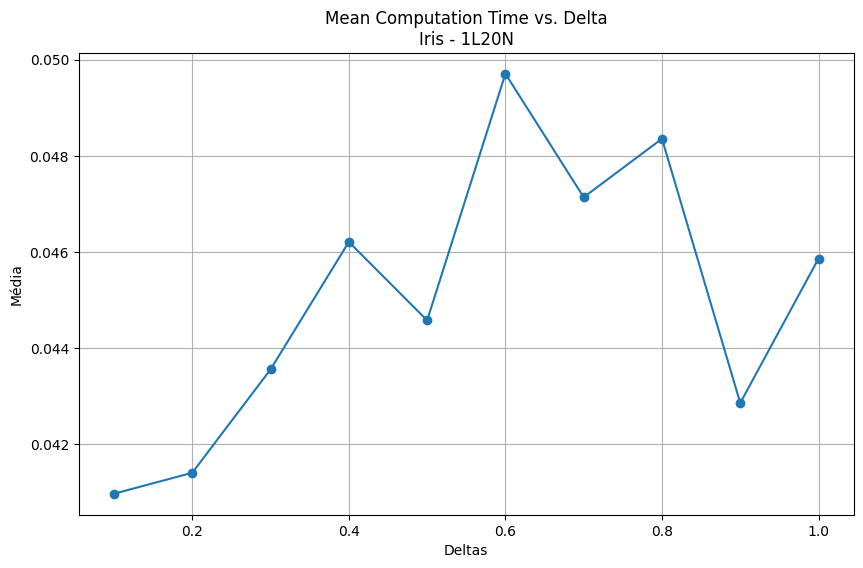

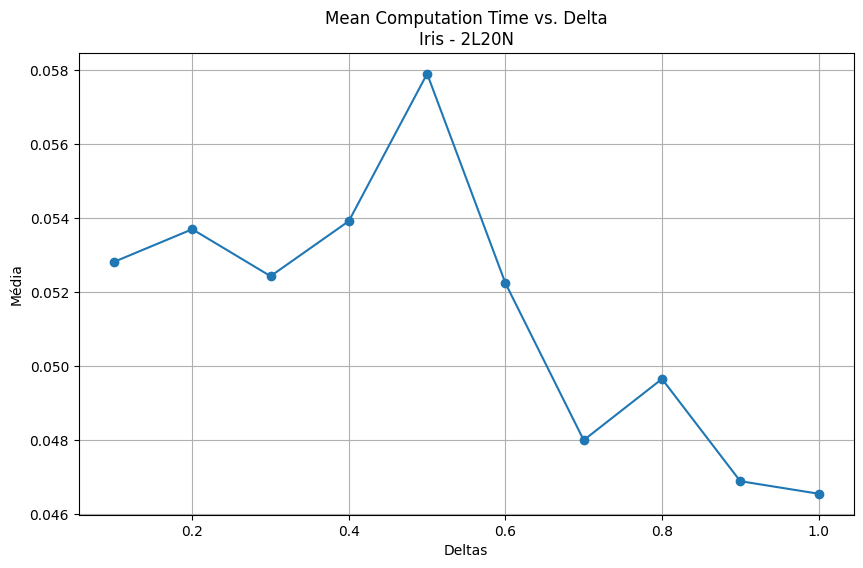

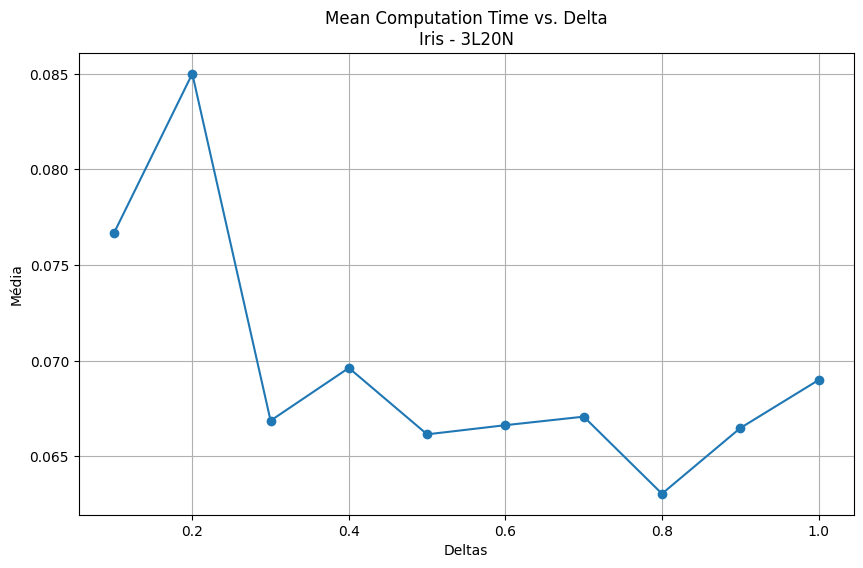

In [82]:
plot_mean_values(iris_m1, 'Mean Computation Time vs. Delta\nIris - 1L20N')
plot_mean_values(iris_m2, 'Mean Computation Time vs. Delta\nIris - 2L20N')
plot_mean_values(iris_m3, 'Mean Computation Time vs. Delta\nIris - 3L20N')

# Wine

### Tamanho

In [83]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,1.97 ± 2.6998,9.70 ± 4.2320,13.00 ± 0.0000
0.2,4.98 ± 3.0199,10.88 ± 2.8152,13.00 ± 0.0000
0.3,6.73 ± 2.2488,11.46 ± 2.0853,13.00 ± 0.0000
0.4,7.69 ± 1.8638,11.68 ± 1.7198,13.00 ± 0.0000
0.5,8.25 ± 1.5516,11.73 ± 1.7138,13.00 ± 0.0000
0.6,8.63 ± 1.3759,11.70 ± 1.7117,13.00 ± 0.0000
0.7,8.87 ± 1.2301,11.73 ± 1.6844,13.00 ± 0.0000
0.8,9.00 ± 1.2000,11.85 ± 1.5772,13.00 ± 0.0000
0.9,9.04 ± 1.1655,11.84 ± 1.5982,13.00 ± 0.0000
1.0,9.05 ± 1.1694,11.86 ± 1.5686,13.00 ± 0.0000


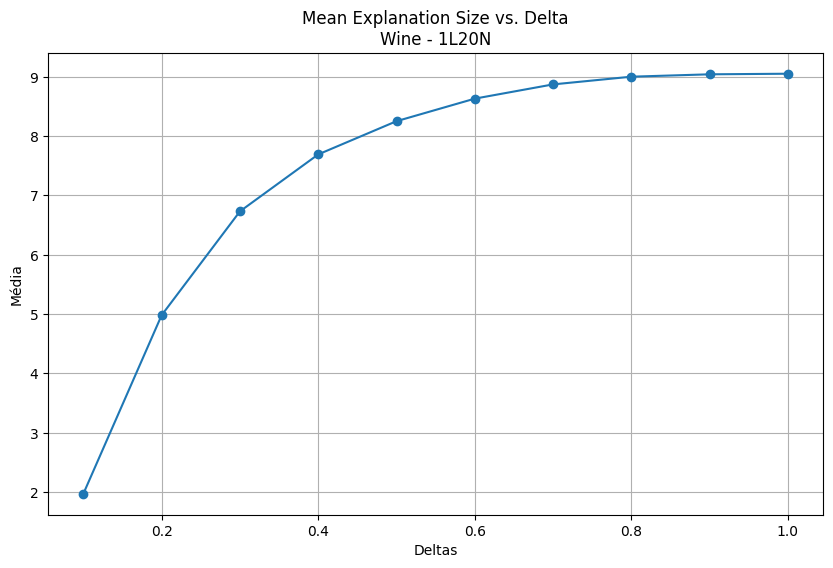

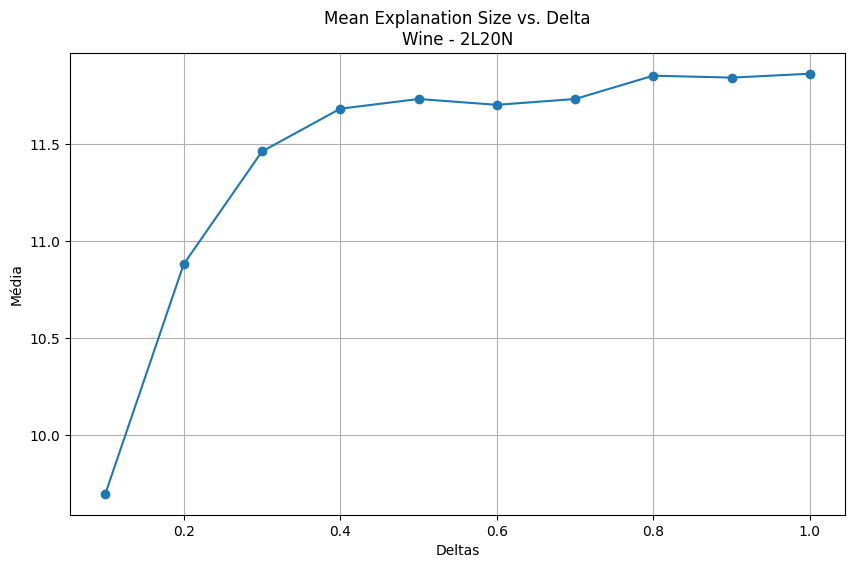

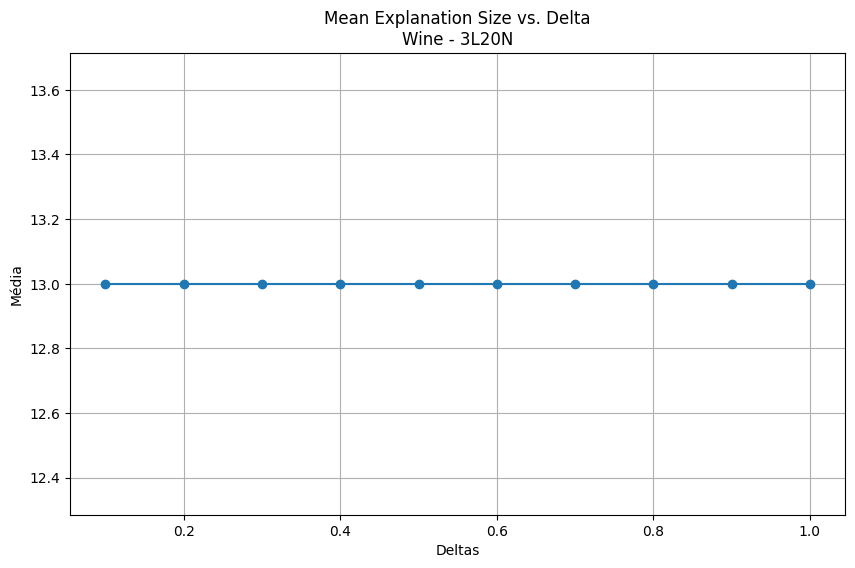

In [84]:
plot_mean_values(wine_m1, 'Mean Explanation Size vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Explanation Size vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Explanation Size vs. Delta\nWine - 3L20N')

### Tempo

In [85]:
wine_m1, wine_m1_mean, wine_m1_std = process_model_data(wine, 'model_1layers_20neurons.h5', deltas, column_name='relaxed_times')
wine_m2, wine_m2_mean, wine_m2_std = process_model_data(wine, 'model_2layers_20neurons.h5', deltas, column_name='relaxed_times')
wine_m3, wine_m3_mean, wine_m3_std = process_model_data(wine, 'model_3layers_20neurons.h5', deltas, column_name='relaxed_times')

format_mean_std(wine_m1_mean, wine_m2_mean, wine_m3_mean, wine_m1_std, wine_m2_std, wine_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.1047 ± 0.0227,0.1525 ± 0.0422,0.1694 ± 0.0405
0.2,0.1222 ± 0.0228,0.1558 ± 0.0578,0.1643 ± 0.0214
0.3,0.1282 ± 0.0216,0.1527 ± 0.0413,0.1637 ± 0.0184
0.4,0.1307 ± 0.0246,0.1552 ± 0.0490,0.1692 ± 0.0330
0.5,0.1399 ± 0.0400,0.1541 ± 0.0441,0.1662 ± 0.0319
0.6,0.1453 ± 0.0513,0.1593 ± 0.0457,0.1646 ± 0.0262
0.7,0.1379 ± 0.0361,0.1553 ± 0.0423,0.1693 ± 0.0302
0.8,0.1341 ± 0.0249,0.1588 ± 0.0474,0.1682 ± 0.0288
0.9,0.1448 ± 0.0586,0.1555 ± 0.0365,0.1634 ± 0.0267
1.0,0.1458 ± 0.0455,0.1616 ± 0.0487,0.1650 ± 0.0350


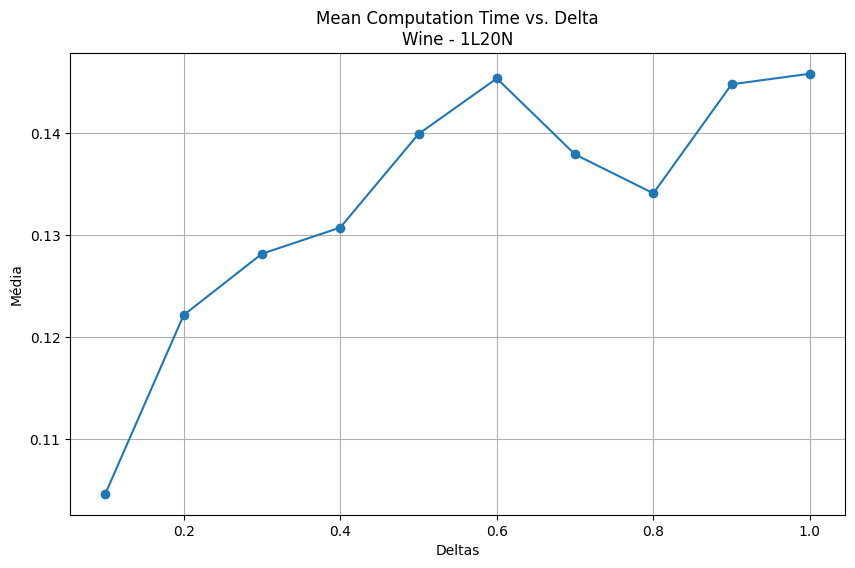

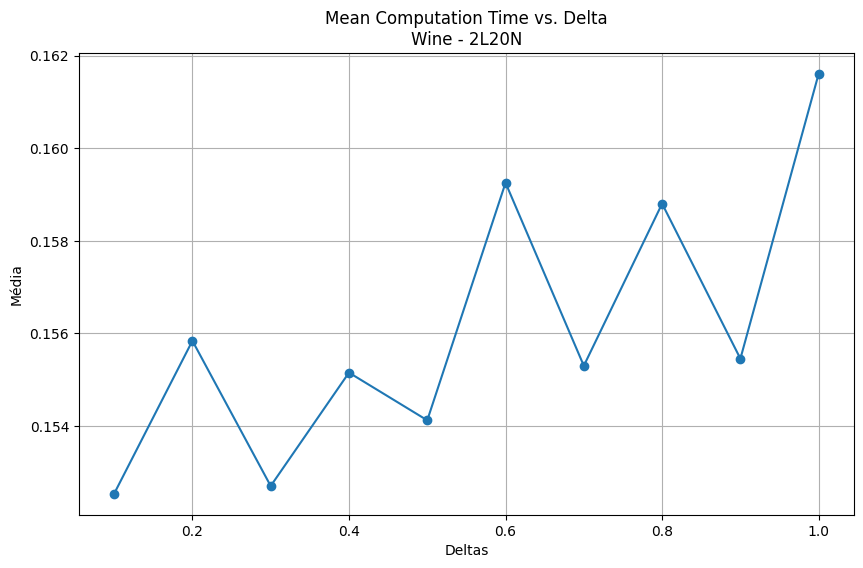

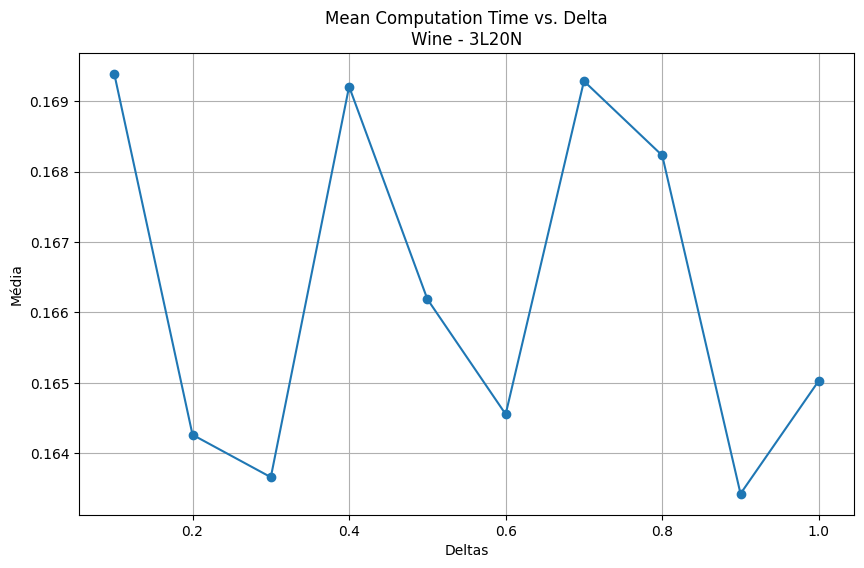

In [86]:
plot_mean_values(wine_m1, 'Mean Computation Time vs. Delta\nWine - 1L20N')
plot_mean_values(wine_m2, 'Mean Computation Time vs. Delta\nWine - 2L20N')
plot_mean_values(wine_m3, 'Mean Computation Time vs. Delta\nWine - 3L20N')

# Breast Cancer

### Tamanho

In [87]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,12.05 ± 8.7651,26.69 ± 4.6684,30.00 ± 0.0000
0.2,18.33 ± 5.5930,27.38 ± 3.6682,30.00 ± 0.0000
0.3,20.25 ± 4.0283,27.58 ± 3.3769,30.00 ± 0.0000
0.4,21.25 ± 3.6342,27.71 ± 3.2474,30.00 ± 0.0000
0.5,21.48 ± 3.6837,27.78 ± 3.1292,30.00 ± 0.0000
0.6,21.94 ± 3.3311,27.80 ± 3.1241,30.00 ± 0.0000
0.7,21.84 ± 3.6324,27.80 ± 3.0854,30.00 ± 0.0000
0.8,21.91 ± 3.7016,27.85 ± 3.0639,30.00 ± 0.0000
0.9,22.06 ± 3.5435,27.80 ± 3.1048,30.00 ± 0.0000
1.0,22.05 ± 3.5535,27.83 ± 3.0465,30.00 ± 0.0000


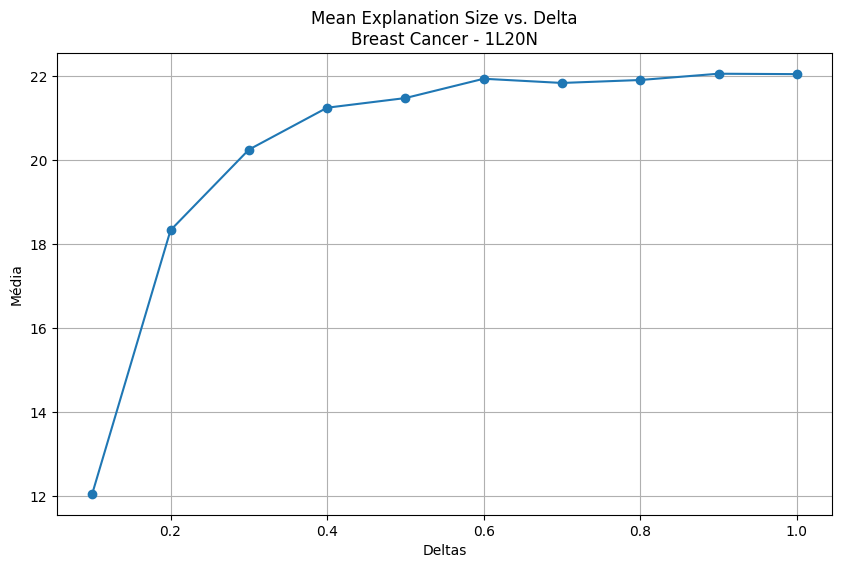

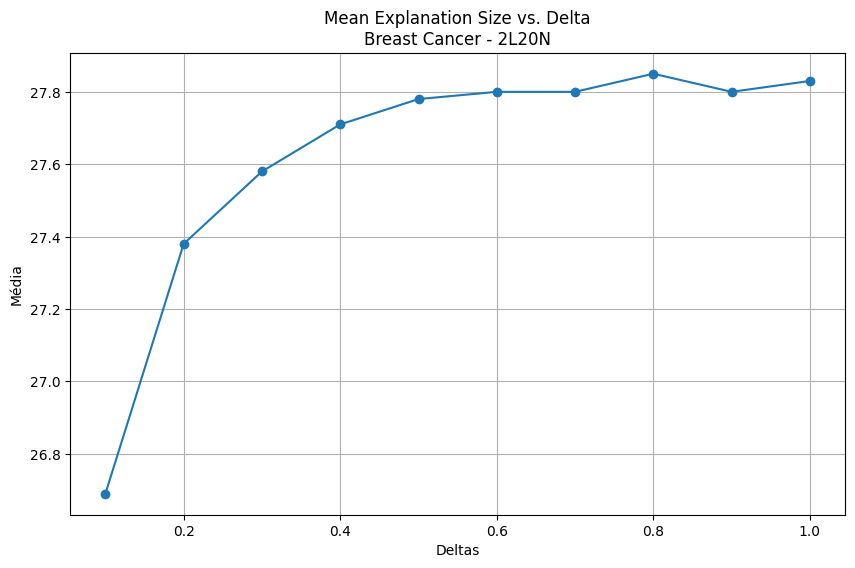

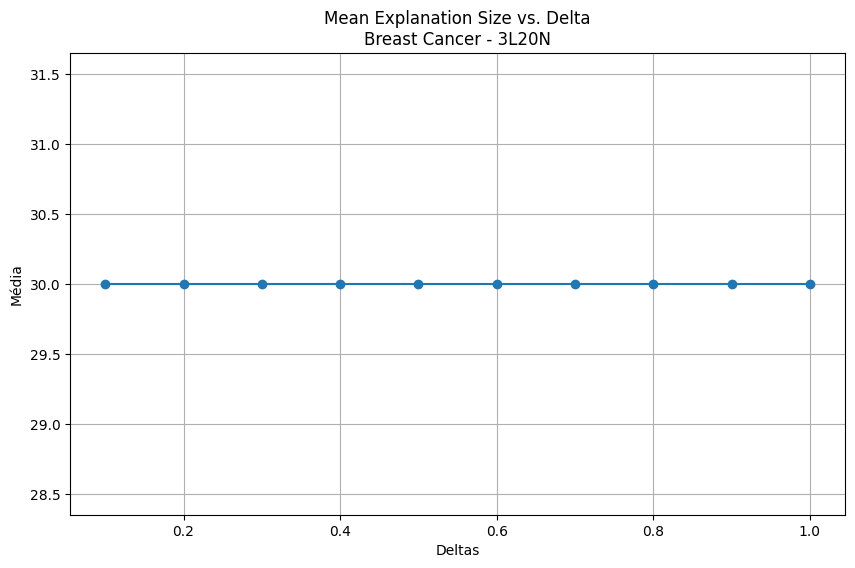

In [88]:
plot_mean_values(breast_cancer_m1, 'Mean Explanation Size vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Explanation Size vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Explanation Size vs. Delta\nBreast Cancer - 3L20N')

### Tempo

In [89]:
breast_cancer_m1, breast_cancer_m1_mean, breast_cancer_m1_std = process_model_data(breast_cancer, 'model_1layers_20neurons.h5', deltas, column_name='relaxed_times')
breast_cancer_m2, breast_cancer_m2_mean, breast_cancer_m2_std = process_model_data(breast_cancer, 'model_2layers_20neurons.h5', deltas, column_name='relaxed_times')
breast_cancer_m3, breast_cancer_m3_mean, breast_cancer_m3_std = process_model_data(breast_cancer, 'model_3layers_20neurons.h5', deltas, column_name='relaxed_times')

format_mean_std(breast_cancer_m1_mean, breast_cancer_m2_mean, breast_cancer_m3_mean, breast_cancer_m1_std, breast_cancer_m2_std, breast_cancer_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")


,1L20N,2L20N,3L20N
0.1,0.2379 ± 0.0393,0.2910 ± 0.0640,0.3161 ± 0.0372
0.2,0.2759 ± 0.0451,0.3080 ± 0.0899,0.3154 ± 0.0287
0.3,0.2959 ± 0.0509,0.3209 ± 0.1015,0.3292 ± 0.0392
0.4,0.3132 ± 0.0724,0.3128 ± 0.0948,0.3391 ± 0.0527
0.5,0.3357 ± 0.0947,0.3194 ± 0.0966,0.3296 ± 0.0255
0.6,0.3422 ± 0.1000,0.3184 ± 0.1023,0.3318 ± 0.0258
0.7,0.3448 ± 0.1105,0.3322 ± 0.1204,0.3336 ± 0.0365
0.8,0.3415 ± 0.1094,0.3345 ± 0.1247,0.3318 ± 0.0364
0.9,0.3528 ± 0.1224,0.3278 ± 0.1130,0.3335 ± 0.0326
1.0,0.3573 ± 0.1179,0.3339 ± 0.1178,0.3335 ± 0.0313


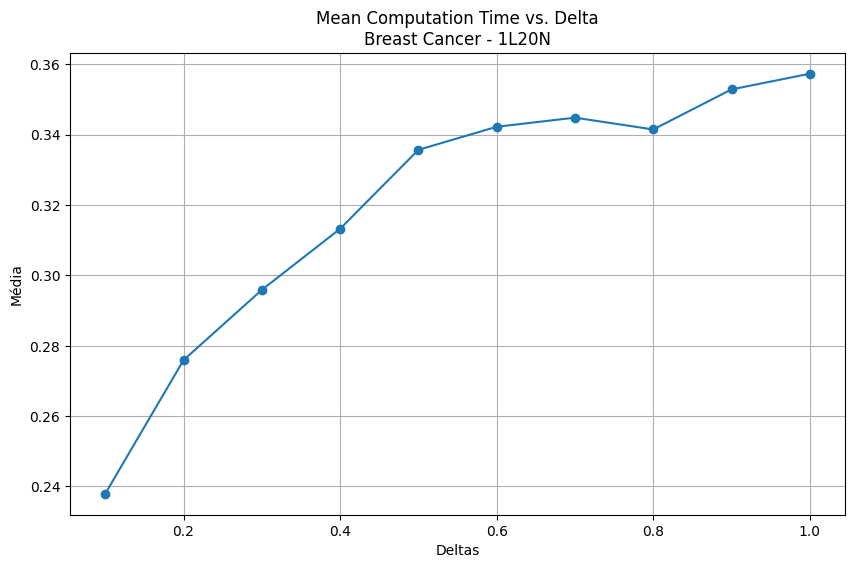

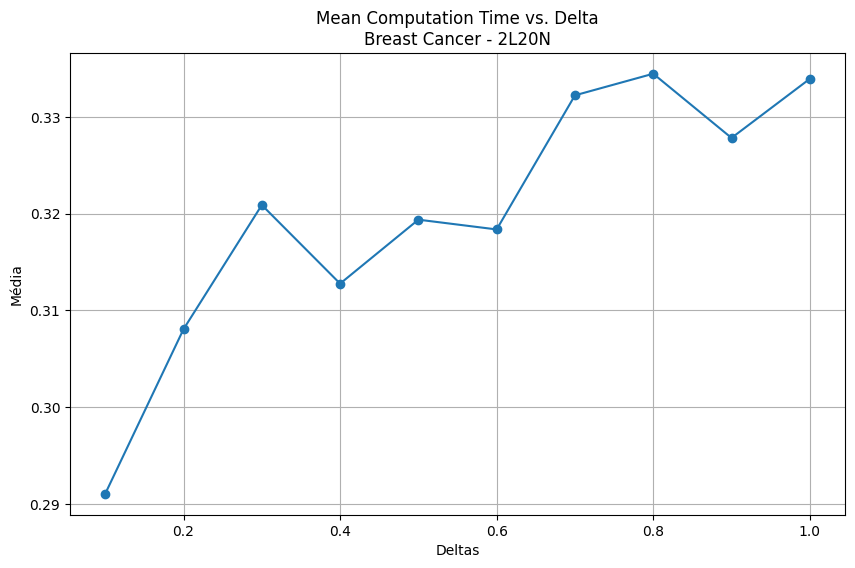

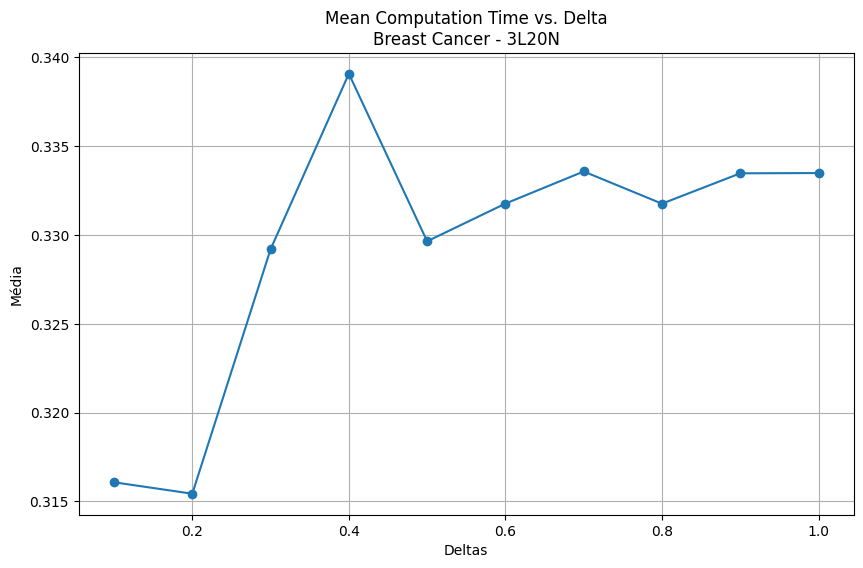

In [90]:
plot_mean_values(breast_cancer_m1, 'Mean Computation Time vs. Delta\nBreast Cancer - 1L20N')
plot_mean_values(breast_cancer_m2, 'Mean Computation Time vs. Delta\nBreast Cancer - 2L20N')
plot_mean_values(breast_cancer_m3, 'Mean Computation Time vs. Delta\nBreast Cancer - 3L20N')

# Glass

In [91]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,3.74 ± 2.3135,9.00 ± 0.0000,8.80 ± 0.9487
0.2,5.07 ± 1.8615,9.00 ± 0.0000,8.89 ± 0.5272
0.3,6.06 ± 1.6360,9.00 ± 0.0000,8.91 ± 0.4024
0.4,6.56 ± 1.4235,9.00 ± 0.0000,8.93 ± 0.3242
0.5,7.00 ± 1.1832,9.00 ± 0.0000,8.96 ± 0.1960
0.6,7.10 ± 1.1180,9.00 ± 0.0000,8.94 ± 0.3105
0.7,7.16 ± 1.0268,9.00 ± 0.0000,8.95 ± 0.2598
0.8,7.23 ± 0.9472,9.00 ± 0.0000,8.98 ± 0.1400
0.9,7.26 ± 0.9233,9.00 ± 0.0000,8.98 ± 0.1400
1.0,7.27 ± 0.9258,9.00 ± 0.0000,8.98 ± 0.1400


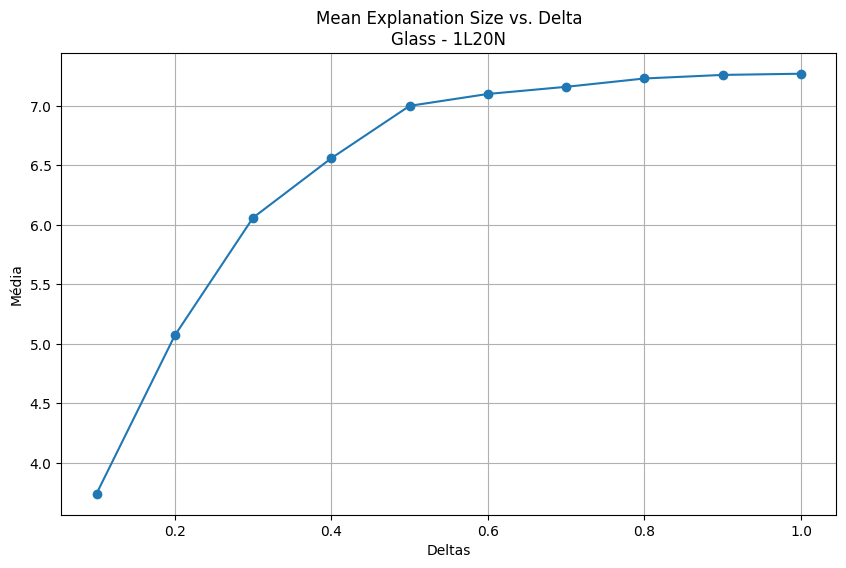

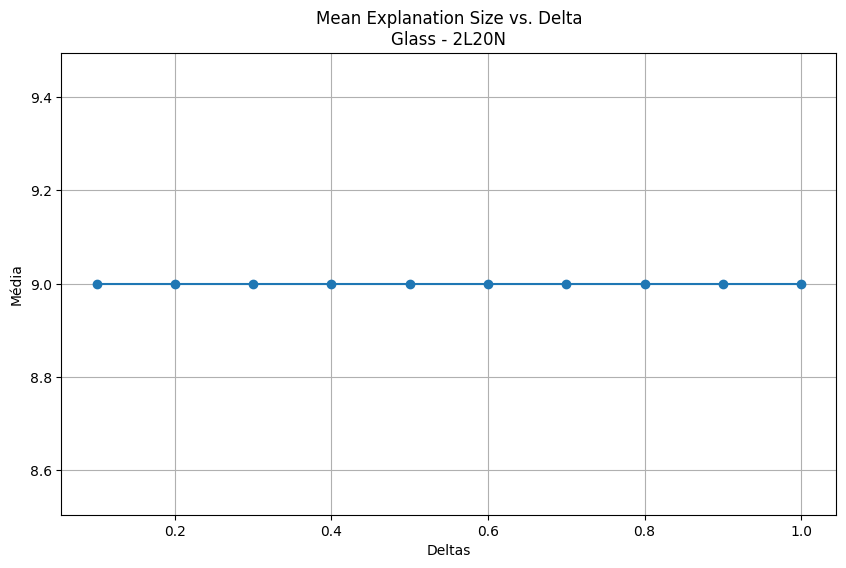

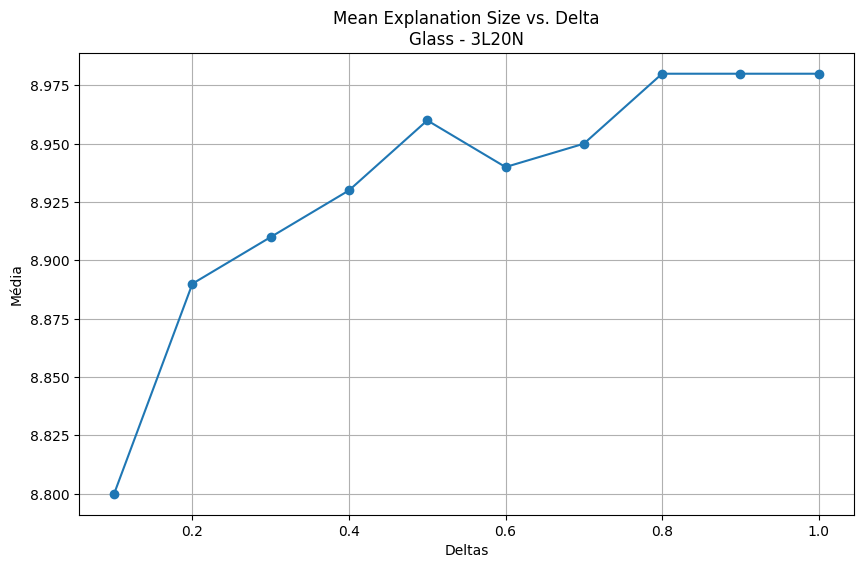

In [92]:
plot_mean_values(glass_m1, 'Mean Explanation Size vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Explanation Size vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Explanation Size vs. Delta\nGlass - 3L20N')

In [93]:
glass_m1, glass_m1_mean, glass_m1_std = process_model_data(glass, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_times")
glass_m2, glass_m2_mean, glass_m2_std = process_model_data(glass, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_times")
glass_m3, glass_m3_mean, glass_m3_std = process_model_data(glass, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_times")

format_mean_std(glass_m1_mean, glass_m2_mean, glass_m3_mean, glass_m1_std, glass_m2_std, glass_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.0784 ± 0.0152,0.1076 ± 0.0336,0.1289 ± 0.0337
0.2,0.0864 ± 0.0255,0.0960 ± 0.0194,0.1226 ± 0.0461
0.3,0.0914 ± 0.0309,0.0957 ± 0.0287,0.1167 ± 0.0345
0.4,0.0905 ± 0.0232,0.0958 ± 0.0259,0.1167 ± 0.0326
0.5,0.0883 ± 0.0196,0.0903 ± 0.0109,0.1156 ± 0.0309
0.6,0.0901 ± 0.0261,0.0923 ± 0.0201,0.1153 ± 0.0326
0.7,0.0915 ± 0.0313,0.0907 ± 0.0139,0.1136 ± 0.0341
0.8,0.0895 ± 0.0263,0.0905 ± 0.0211,0.1134 ± 0.0349
0.9,0.0914 ± 0.0359,0.0927 ± 0.0173,0.1118 ± 0.0286
1.0,0.0926 ± 0.0330,0.0893 ± 0.0067,0.1159 ± 0.0370


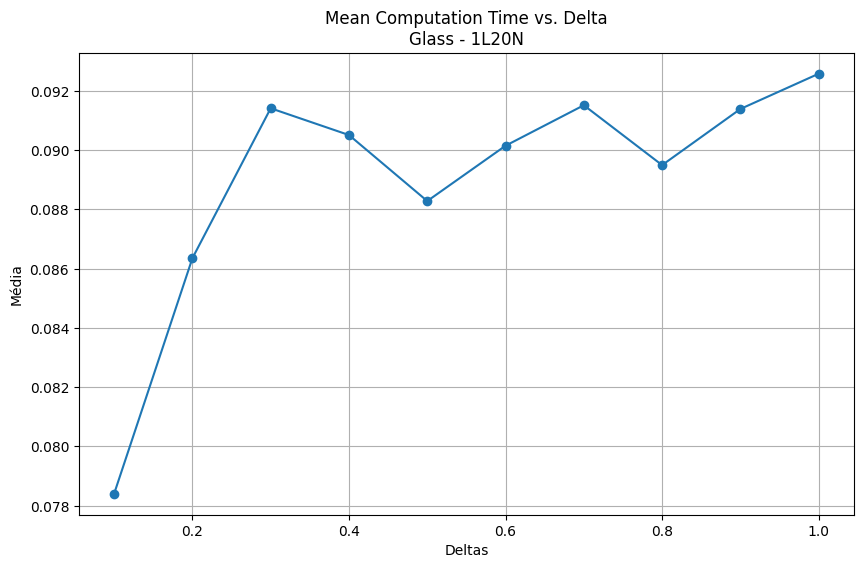

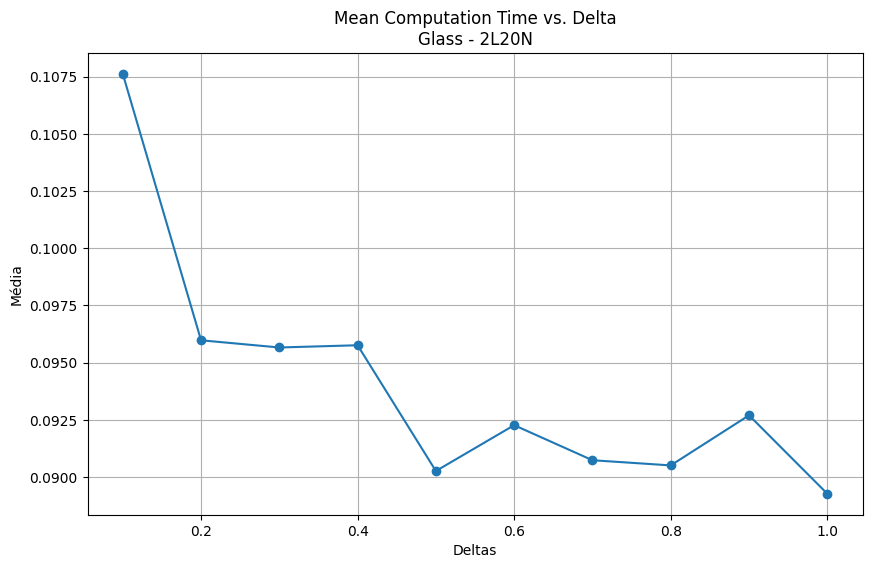

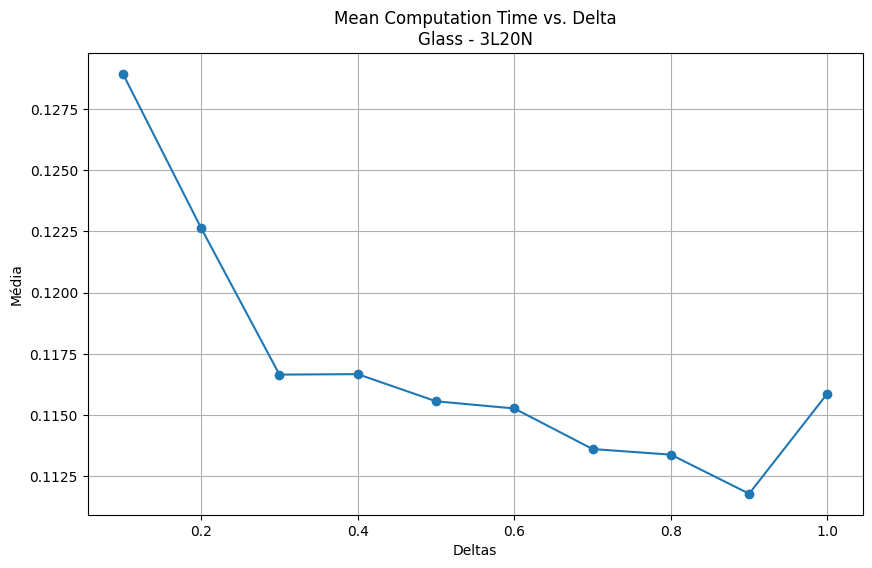

In [94]:
plot_mean_values(glass_m1, 'Mean Computation Time vs. Delta\nGlass - 1L20N')
plot_mean_values(glass_m2, 'Mean Computation Time vs. Delta\nGlass - 2L20N')
plot_mean_values(glass_m3, 'Mean Computation Time vs. Delta\nGlass - 3L20N')

# Digits

In [95]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_len_eq")
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_len_eq")

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas)

,1L20N,2L20N,3L20N
0.1,7.97 ± 10.4139,64.00 ± 0.0000,64.00 ± 0.0000
0.2,22.01 ± 8.3024,64.00 ± 0.0000,64.00 ± 0.0000
0.3,28.90 ± 5.7035,64.00 ± 0.0000,64.00 ± 0.0000
0.4,32.74 ± 4.7468,64.00 ± 0.0000,64.00 ± 0.0000
0.5,35.43 ± 4.3273,64.00 ± 0.0000,64.00 ± 0.0000
0.6,37.47 ± 3.7080,64.00 ± 0.0000,64.00 ± 0.0000
0.7,39.04 ± 3.2247,64.00 ± 0.0000,64.00 ± 0.0000
0.8,40.28 ± 3.0466,64.00 ± 0.0000,64.00 ± 0.0000
0.9,41.40 ± 2.9631,64.00 ± 0.0000,64.00 ± 0.0000
1.0,43.81 ± 3.0123,64.00 ± 0.0000,64.00 ± 0.0000


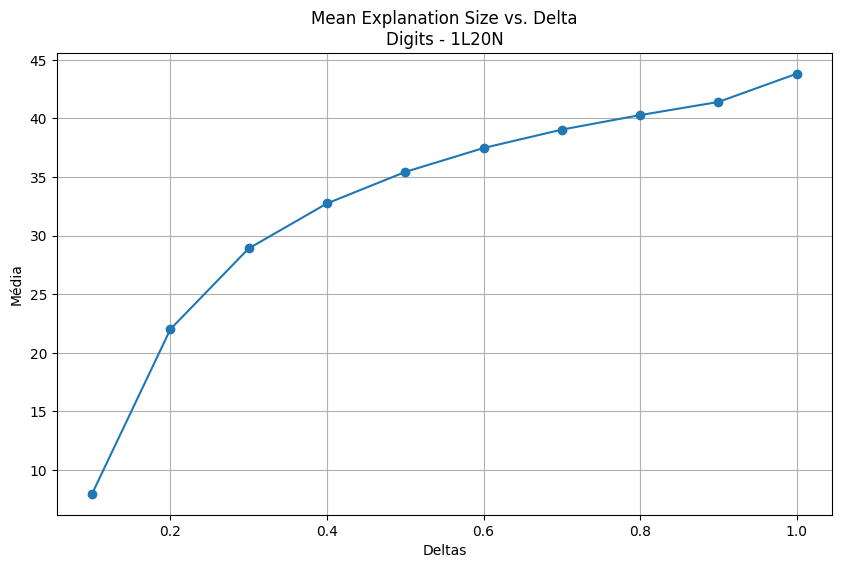

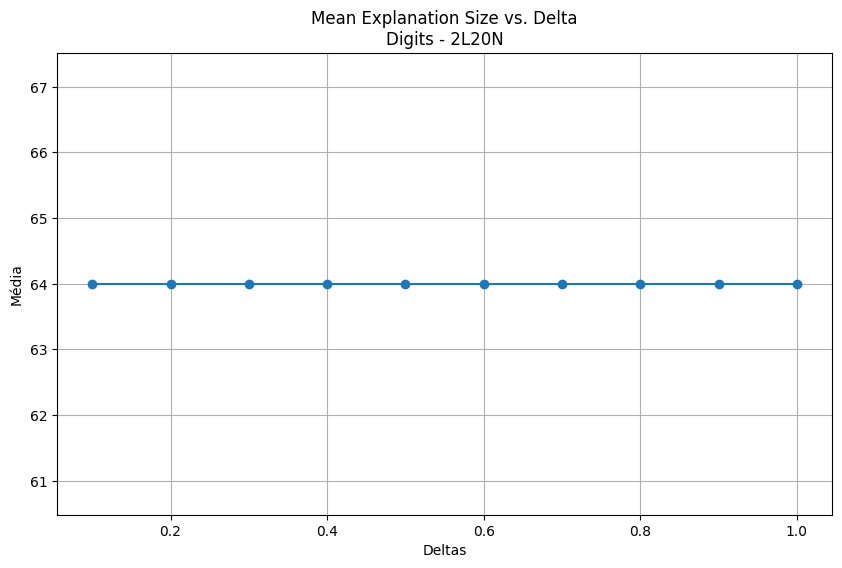

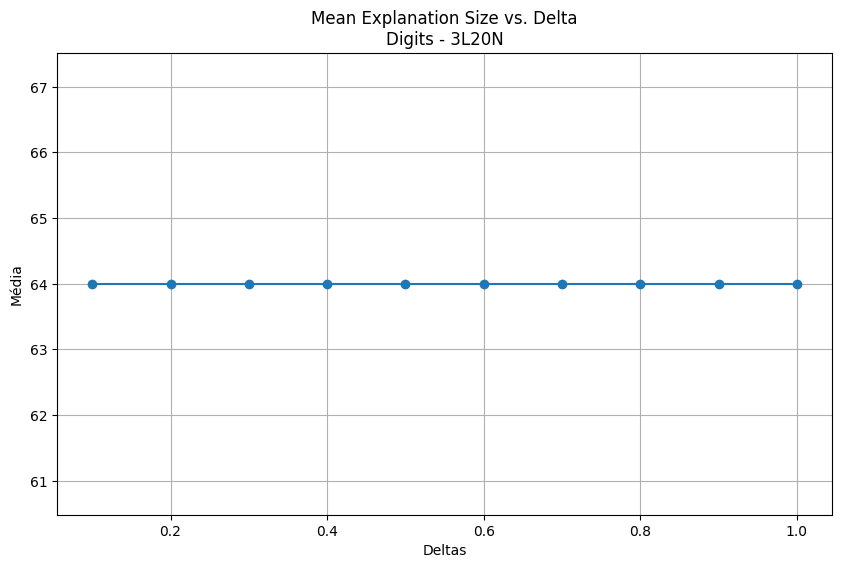

In [96]:
plot_mean_values(digits_m1, 'Mean Explanation Size vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Explanation Size vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Explanation Size vs. Delta\nDigits - 3L20N')

In [97]:
digits_m1, digits_m1_mean, digits_m1_std = process_model_data(digits, 'model_1layers_20neurons.h5', deltas, column_name="relaxed_times")
digits_m2, digits_m2_mean, digits_m2_std = process_model_data(digits, 'model_2layers_20neurons.h5', deltas, column_name="relaxed_times")
digits_m3, digits_m3_mean, digits_m3_std = process_model_data(digits, 'model_3layers_20neurons.h5', deltas, column_name="relaxed_times")

format_mean_std(digits_m1_mean, digits_m2_mean, digits_m3_mean, digits_m1_std, digits_m2_std, digits_m3_std, deltas, mean_format="{:.4f}", std_format="{:.4f}")

,1L20N,2L20N,3L20N
0.1,0.8854 ± 0.1713,0.6060 ± 0.1038,0.7397 ± 0.2216
0.2,1.2573 ± 0.2812,0.6036 ± 0.0461,0.6861 ± 0.0713
0.3,1.2140 ± 0.3162,0.5971 ± 0.0545,0.6415 ± 0.0778
0.4,1.2754 ± 0.3498,0.5771 ± 0.0430,0.6273 ± 0.0739
0.5,1.3124 ± 0.3417,0.5720 ± 0.0246,0.6120 ± 0.0417
0.6,1.3434 ± 0.3481,0.5754 ± 0.0459,0.6146 ± 0.0467
0.7,1.3627 ± 0.3131,0.5775 ± 0.0439,0.6260 ± 0.0935
0.8,1.3734 ± 0.3698,0.5742 ± 0.0348,0.6146 ± 0.0444
0.9,1.3918 ± 0.3317,0.5755 ± 0.0264,0.6186 ± 0.0528
1.0,1.4583 ± 0.3758,0.5811 ± 0.0442,0.6214 ± 0.0606


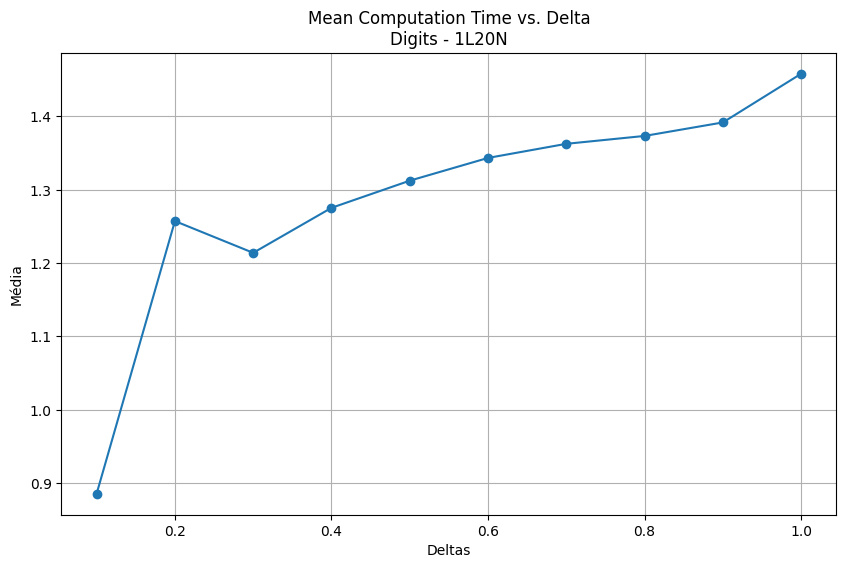

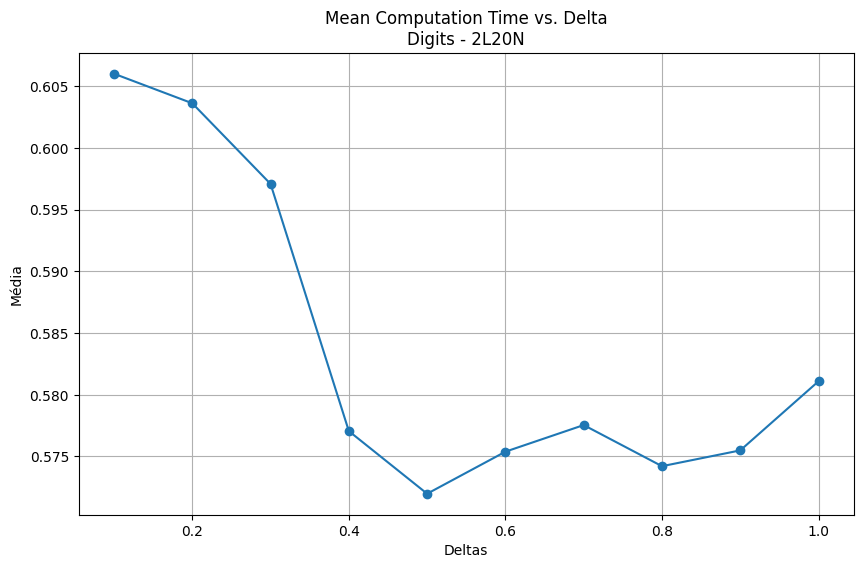

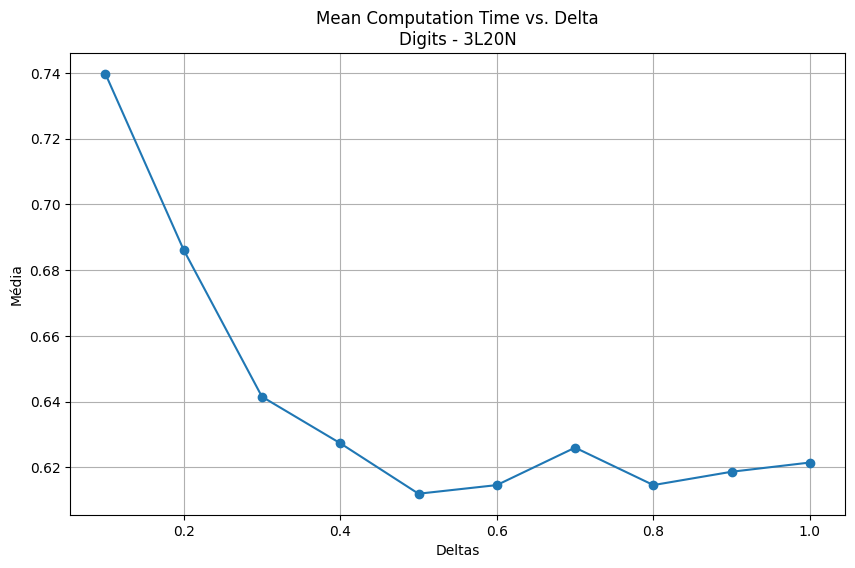

In [98]:
plot_mean_values(digits_m1, 'Mean Computation Time vs. Delta\nDigits - 1L20N')
plot_mean_values(digits_m2, 'Mean Computation Time vs. Delta\nDigits - 2L20N')
plot_mean_values(digits_m3, 'Mean Computation Time vs. Delta\nDigits - 3L20N')